# Foundation+YSE z-band Sample Selection

In this notebook, we re-create the sample from the selection cuts presented in Hayes+2024. If you find this resource or the associated paper useful for your work, please cite: .

In [1]:
# Imports
import matplotlib.pyplot as plt
import astropy.table as at

from py import utils

plt.style.use('./stylesheet/zband.mplstyle')

## Sample Selection

The default cuts used in the fiducial analysis of Hayes+2024 are applied below. Feel free to adjust these cuts as desired!

In [2]:
# Listed below are the default data cuts applied to the sample, as described in Hayes+24.
# If these are changed, do make sure to add the argument to the apply_data_cuts function below!

keep_91Ts = False                           # exclude 91Ts in the sample
redshift_lower_limit = 0.015                # redshift lower limit
redshift_upper_limit_YSE = 0.1              # redshift upper limit for YSE sample
redshift_upper_limit_Foundation = 0.08      # redshift upper limit for Foundation sample
g_obs, r_obs, i_obs = 1, 1, 1               # minimum number of g/r/i-band observations
gri_prepeak = True                          # require at least 1 observation in any of g/r/i-bands pre-peak
z_obs = 3                                   # minimum number of z-band observations
z_prepeak = False                           # require z-band data pre-peak
chi_squared_threshold = 3                   # maximum chi squared based on griz fit
t0_unc_threshold = 1                        # require an uncertainty on the time of maximum of this threshold (in days)
t0_agreement_threshold = 0.5                # require an agreement in the time of maximum from the gri and griz fits of this threshold (in days)
Av_upper_limit = 1                          # require Av less than this threshold
theta_lower_limit = -1.5                    # minimum theta value (from griz fit)
theta_upper_limit = 3                       # maximum theta value (from griz fit)
host_galaxy_mass = True                     # require a host galaxy mass estimate
save_path = 'hayes24_sample'                # if an output path is specified, the SNe that pass the data cuts will be saved to a csv file

In [3]:
full_data = at.Table.read('../tables/full.csv', format='csv')
sample = utils.apply_data_cuts(full_data, save_path=save_path)

Total Spec Sample:               517 (YSE: 292, Foundation: 225)
Normal Ias:                      446 (YSE: 266, Foundation: 180)
0.015 < z < 0.1:                 344 (YSE: 182, Foundation: 162)
(z < 0.08 for Foundation)
gri Data Requirement:            229 (YSE: 114, Foundation: 115)
z-band Data Requirement:         168 (YSE: 54, Foundation: 114)
Reduced Chi Squared < 3:         162 (YSE: 51, Foundation: 111)
T0 Cut:                          145 (YSE: 40, Foundation: 105)
Av < 1:                          145 (YSE: 40, Foundation: 105)
-1.5 < theta < 3:                144 (YSE: 39, Foundation: 105)
Host Mass Estimate:              141 (YSE: 37, Foundation: 104)

Final Sample:                    141 (YSE: 37, Foundation: 104)
* For complete description of the default data cuts, see Hayes+2024.


## Sample Distribution Plots

Re-create Figures 2-4 in Hayes+24 with the sample specified above.

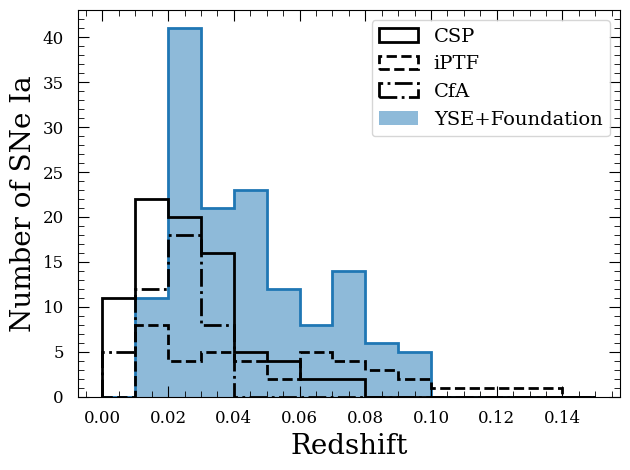

In [4]:
fig = utils.plot_histogram(sample, key='REDSHIFT_FINAL')

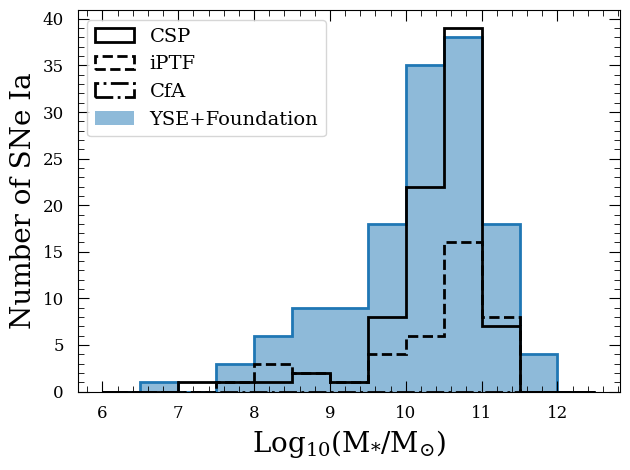

In [5]:
fig = utils.plot_histogram(sample, key="LOG_HOSTMASS")

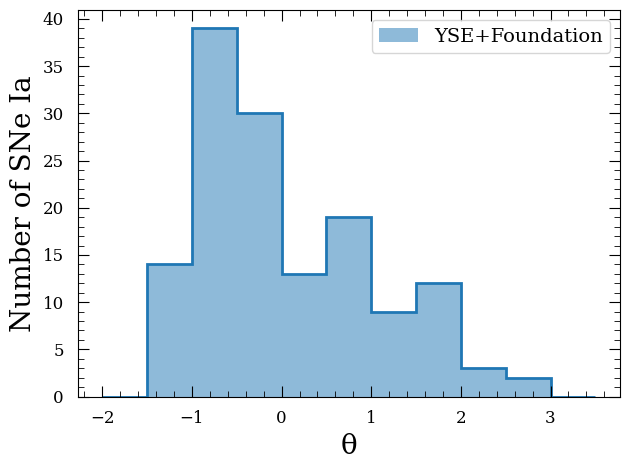

In [6]:
fig = utils.plot_histogram(sample, key="GRIZ_THETA")

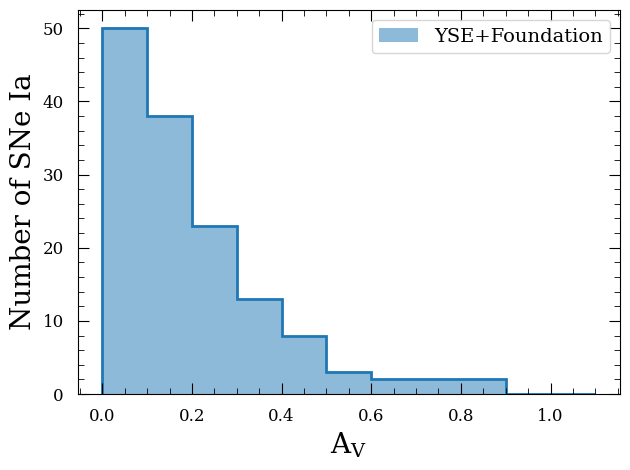

In [7]:
fig = utils.plot_histogram(sample, key="GRIZ_AV")